<a href="https://colab.research.google.com/github/Dinsaurralde/AnalisisYCuracion/blob/master/TP2_analisis_y_curacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas en las Sucursales de una Cadena de Supermercados

# Trabajo Práctico N°2: Análisis y Curación

## Introducción


En este práctico se busca profundizar el conocimiento de las series bajo estudio y realizar tareas de preprocesamiento.

En lo desarrollado en el primer práctico pudimos notar algunas características propias de los datos de series temporales y en particular de las ventas de las sucursales. Algunas de ellas son que se trata de series no estacionarias, o sea que sus distribuciones cambian a través del tiempo pero no parecen presentar raíces unitarias. Además, se aprecian patrones de estacionalidad. Lo antes descripto tiene consecuencias directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de valores faltantes, detección de outliers y la construcción de modelos predictivos y/o causales.



### Carga del dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [90]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

In [91]:
df

store_nbr,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


Guardado del dataset

In [92]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [93]:
df = pd.read_excel('dataset.xlsx',index_col=0 ,parse_dates=True)

In [94]:
df

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


# Consignas del trabajo práctico N°2

Se proponen las siguientes actividades motivadoras:

__Transformaciones__

Indagar sobre la utilidad de aplicar transformaciones sobre las series. Por ejemplo: logaritmo natural, diferencias, tasa de crecimiento, estandarización, normalizacion, transformaciones de Box y Cox, etc.

__Tratamiento de outliers y ceros__

- Analizar los posibles cursos de acción a tomar sobre los valores nulos(ceros) de las series.

- Trabajar en la identificación de valores atípicos. Entre otros métodos, se pueden filtrar la tendencia y/o estacionalidad tomando diferencias antes de aplicar los métodos estándar para corte transversal; o el algoritmo Facebook Prophet aplicado a la detección de anomalías[(Ejemplo)](https://www.analyticsvidhya.com/blog/2021/12/anomaly-detection-model-using-facebook-prophet/).  

__Análisis Exploratorio__

Realizar un análisis exploratorio sobre las series tratadas y/o transformadas (reciclando parte del código desarrollado en el TP1).

__Generación de features__

A partir de las series originales generar features, por ejemplo:
- Valores retardados
- Variables dummy: mes del año, día de la semana, etc.

__Opcional__

- Explorar si los features pueden ser útiles para predecir a las series.
- Añadir otros features de la base de datos provista u otras fuentes externas.


## Fecha de entrega

__17/06__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


# **Solución al entregable N°2:**

## **Selección:**

In [95]:
# Conteo de días sin ventas por sucursal durante toda la serie
count_zeros = df[df == 0].count(axis=0).sort_values(ascending = False)
count_zeros

Store 52    1566
Store 22    1011
Store 42     962
Store 21     934
Store 29     808
Store 20     773
Store 53     515
Store 36     131
Store 18     115
Store 24     106
Store 25      66
Store 12      65
Store 14      43
Store 30      28
Store 43       9
Store 17       7
Store 1        6
Store 34       5
Store 41       5
Store 44       5
Store 45       5
Store 46       5
Store 40       5
Store 47       5
Store 48       5
Store 39       5
Store 38       5
Store 37       5
Store 49       5
Store 50       5
Store 51       5
Store 35       5
Store 28       5
Store 33       5
Store 11       5
Store 3        5
Store 4        5
Store 5        5
Store 6        5
Store 7        5
Store 8        5
Store 9        5
Store 10       5
Store 13       5
Store 32       5
Store 15       5
Store 16       5
Store 19       5
Store 23       5
Store 26       5
Store 27       5
Store 2        5
Store 31       5
Store 54       5
dtype: int64

In [96]:
#Seleccion de las sucursales que tienen ventas desde el inicio de la serie
cols = count_zeros[count_zeros < 6] 
cols_lista = cols.index
df_filtered = df[cols_lista]

In [97]:
#Seleccion de las mismas 5 Stores del TP1 (muestra)
cols = ['Store 13', 'Store 23', 'Store 5', 'Store 7', 'Store 51']
df_filtered = df_filtered[cols]

## **Tratamiento de ceros y faltantes:**

In [98]:
#Completar el rango de días para que no haya faltantes (25 de Diciembre de cada año)
df_filtered.index = pd.to_datetime(df_filtered.index)
df_filtered = df_filtered.asfreq('D', fill_value=np.nan)

In [99]:
#Reemplazar los 0 por NaN para poder imputarlos con la interpolacion (1 de Enero de cada año son los días con ventas =0)
df_filtered = df_filtered.replace(to_replace=0, value=np.nan)
df_filtered_interp = df_filtered.interpolate(method="linear", direction = "forward")

In [100]:
#Completar el 2013-01-01 con los datos de 2013-01-02 (VER)
##Completar los valores de los días 1 de enero y 25 de diciembre de cada año con los valores de ventas del día siguiente
df_filtered = pd.DataFrame(df_filtered_interp, index=df_filtered.index, columns=df_filtered.columns, dtype=None, copy=False)
df_filtered = df_filtered.fillna(method='bfill')
df_filtered

,Store 13,Store 23,Store 5,Store 7,Store 51
date,,,,,
2013-01-01,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990
2013-01-02,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990
2013-01-03,4852.438995,4911.20401,7770.968000,9277.958000,11170.057015
2013-01-04,4249.484000,5620.52800,7347.641991,8096.573018,12452.326000
2013-01-05,6465.232000,6041.00200,8192.598000,8610.605999,15046.247000
...,...,...,...,...,...
2017-08-11,6217.257000,7046.12400,9510.871000,15090.052970,26070.018000
2017-08-12,7541.866000,6180.08500,8157.070000,14668.772022,19532.964000
2017-08-13,5077.408995,7733.60000,10044.821000,14871.927000,25713.284030


In [101]:
#Función que convierte las columnas en la feature "Store" y agrega otras features
def to_features(df):
  res = df.reset_index().melt(id_vars='date', var_name='Store', value_name='Sales')
  res['Datea']= pd.to_datetime(res['date'], format="%Y/%m/%d")
  res['Year'] = res['Datea'].dt.year
  res['Month'] = res['Datea'].dt.month
  res['Year_month'] = res.date.dt.strftime('%Y-%m')
  res['Weekday'] = res.date.dt.strftime('%A')
  res['Day'] = res['Datea'].dt.day
  res.index=pd.to_datetime(res['Datea'])
  return res

## **Serie Agregada:**

In [102]:
df_agg = df_filtered.sum(axis=1)
df_agg.head()

date
2013-01-01    49807.780010
2013-01-02    49807.780010
2013-01-03    37982.626020
2013-01-04    37766.553008
2013-01-05    44355.684999
Freq: D, dtype: float64

## **Análisis de estacionariedad:**

Usaremos la prueba de Dickey Fuller para verificar la estacionariedad en nuestros datos. Esta prueba generará valores críticos y un p-valor, que nos permitirán aceptar o rechazar la hipótesis nula de que no existe estacionariedad. Si rechazamos la hipótesis nula, eso significa que aceptamos la alternativa, que establece que hay estacionariedad.

Estos valores nos permiten probar el grado en que los valores presentes cambian con los valores pasados. Si no hay estacionariedad en el conjunto de datos, un cambio en los valores presentes no provocará un cambio significativo en los valores pasados.

In [103]:
# #VER VALOR-P DEL ESTADISTICO DICKEY-FULLER PARA COMPROBAR ESTACIONARIEDAD

# # #Perform ADF Test
# from statsmodels.tsa.stattools import adfuller
# adft = adfuller(df_agg,regression= 'ct' , autolag="AIC")
# adft[0]

In [104]:
# output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics",
# "p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
# print(output_df)

HIPOTESIS NULA= la serie tiene raíces unitarias, por tanto, no es estacionaria.

El P-value nos indica la probabilidad de que la hipótesis nula no sea rechazada. En nuestro test tenemos que el P-value es  0.000014, por lo tanto, existe una probabilidad del 0.0014% de que nuestra serie temporal sea no estacionaria. 
Es decir como p-value es menor al 5% no se rechaza la hipotesis nula.

Para finalizar obtenemos los valores críticos para un intervalo de confianza del 1%, del 5% y del 10%. Dado que en este caso el valor de la prueba (-5,6159) es menor que todos los valores críticos, por ello la hipótesis nula en la que se evalúa que en nuestra serie temporal existe una raíz unitaria, no es rechazada, y por ello, concluimos que estamos ante una serie temporal no estacionaria.

Una **raíz unitaria**, es una tendencia estocástica en la serie temporal. Algunas veces se le llama “paseo aleatorio con deriva”. Por tanto, si la serie tiene una raíz unitaria, ésta presenta un patrón sistemático que es impredecible.

Entonces, una serie temporal es estacionaria si un cambio en el tiempo no cambia la forma de la distribución; y las raíces unitarias son una causa de no estacionariedad.

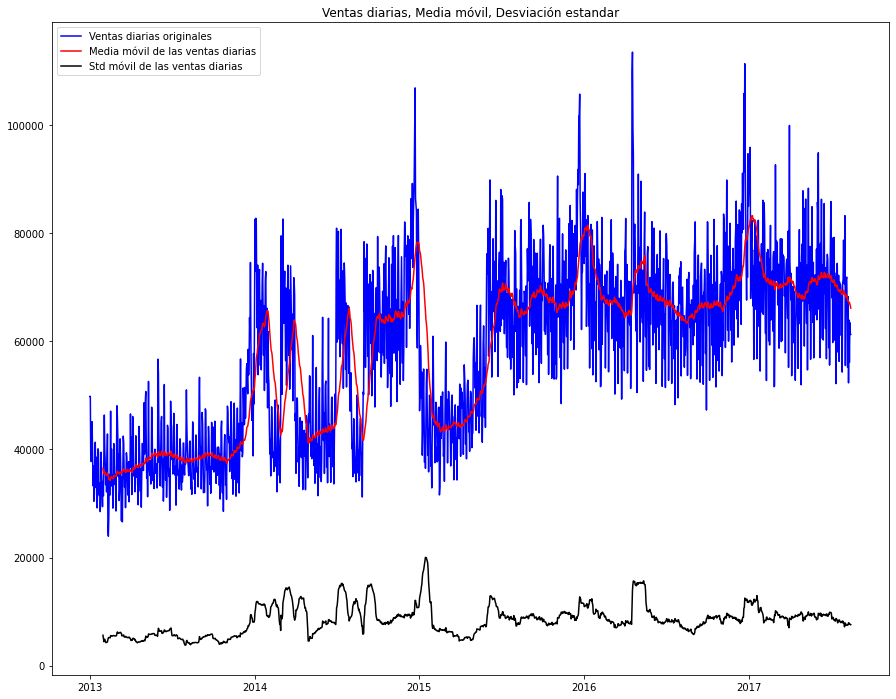

In [105]:
# Calculo de desviación estandar y media móvil para la serie
#https://iartificial.org/ciencia-de-datos/series-temporales-python/
rolling_mean = df_agg.rolling(30).mean()
rolling_std = df_agg.rolling(30).std()
plt.figure(figsize=(15,12))
plt.plot(df_agg, color="blue",label="Ventas diarias originales")
plt.plot(rolling_mean, color="red", label="Media móvil de las ventas diarias")
plt.plot(rolling_std, color="black", label = "Std móvil de las ventas diarias")
plt.title("Ventas diarias, Media móvil, Desviación estandar")
plt.legend(loc="best")

Al trazar la desviación estándar y la media junto con los puntos de datos originales, podemos ver como se 'suavizan' los movimientos de la serie, ya que promediando varios valores se eliminan parte de los movimientos irregulares de la misma. En cuanto a la desviación estandar se puede observar como se acentúa la volatilidad en las ventas en todo el periodo 2014 y con cada cambio de año.  

## **Transformaciones:**

Aplicaremos las técnicas de transformación de datos de series de tiempo a fines de que nuestra serie pueda ser utilizada en los distintos modelos predictivos. 
Los métodos transformación de series de tiempo se ocupan de hacer que los datos de series de tiempo no estacionarios sean estacionarios mediante la identificación y eliminación de tendencias y la eliminación de efectos estacionarios.


### **Logaritmo natural:**

Esta transformación, también conocida como Tasa “continua” de crecimiento de la serie tiene la ventaja que presenta simetría con respecto a cambios positivos y negativos

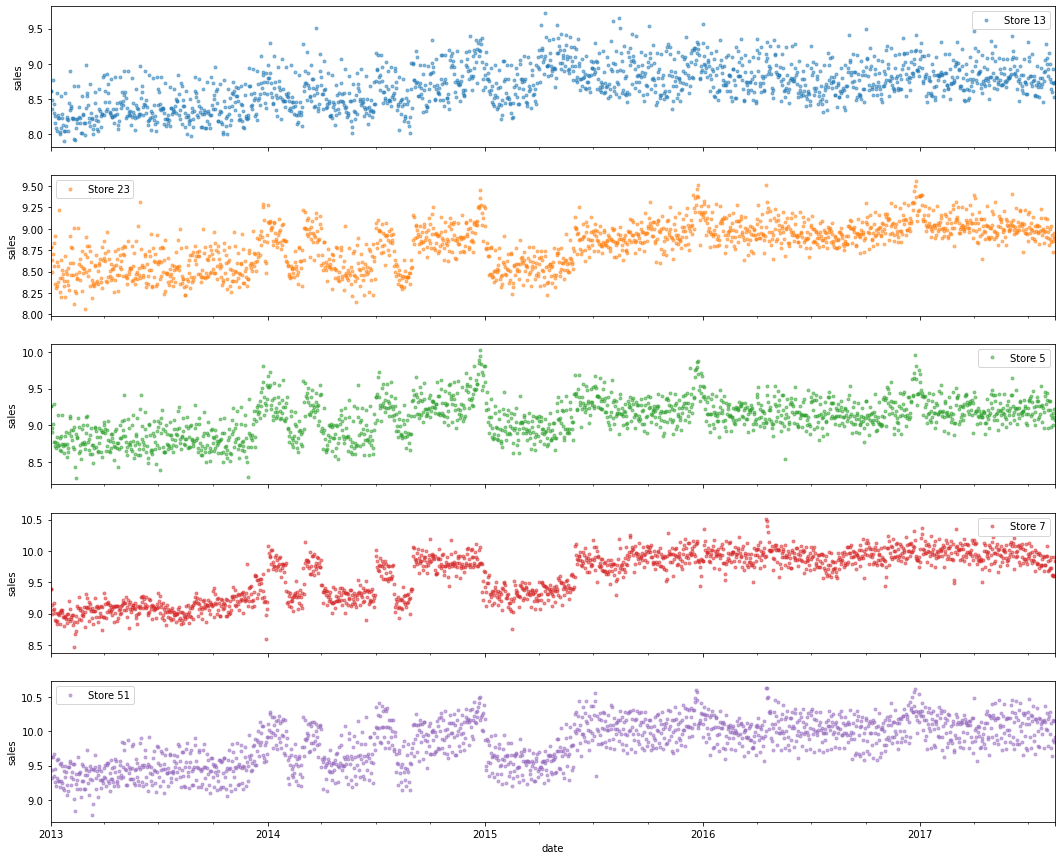

In [106]:
# Logaritmo natural

df_log = np.log(df_filtered)

## Reemplazar infs con NaN 
#ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_log), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_log))

ordered_weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# sns.boxplot(x="Weekday", 
#             y="Sales",
#             order= ordered_weekdays,
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_log),
#             linewidth=2)

axes = df_log.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

### **Diferencias:**


Esta transformación elimina la tendencia de la serie, y la estacionalidad semanal.

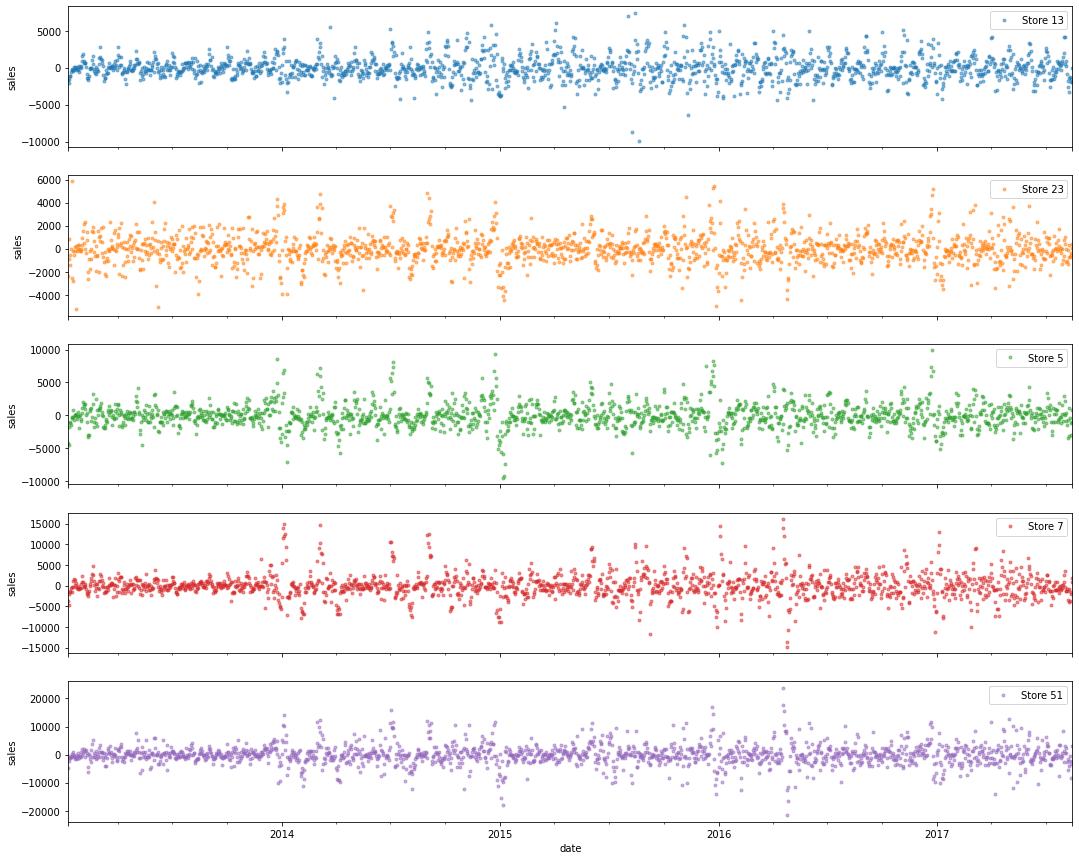

In [107]:
# Diferencias

df_diff = df_filtered.diff(7).dropna()

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_diff), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_diff))

# sns.boxplot(x="Month", 
#             y="Sales", 
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_diff),
#             linewidth=2)

# sns.boxplot(x="Weekday", 
#             y="Sales",
#             order= ordered_weekdays,
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_diff),
#             linewidth=2)

axes = df_diff.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')


En el siguiente gráfico se aprecia como esta transformación, al restar el valor de un día con el mismo de la semana anterior, la diferencia oscila alrededor del valor cero.

In [108]:
#Función figura
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(15,10), linewidth=2)
    ax = datos.plot(ax=ax, legend='Inline label')
    ax.set(title=titulo, xlabel=" ", ylabel=y)
    return fig

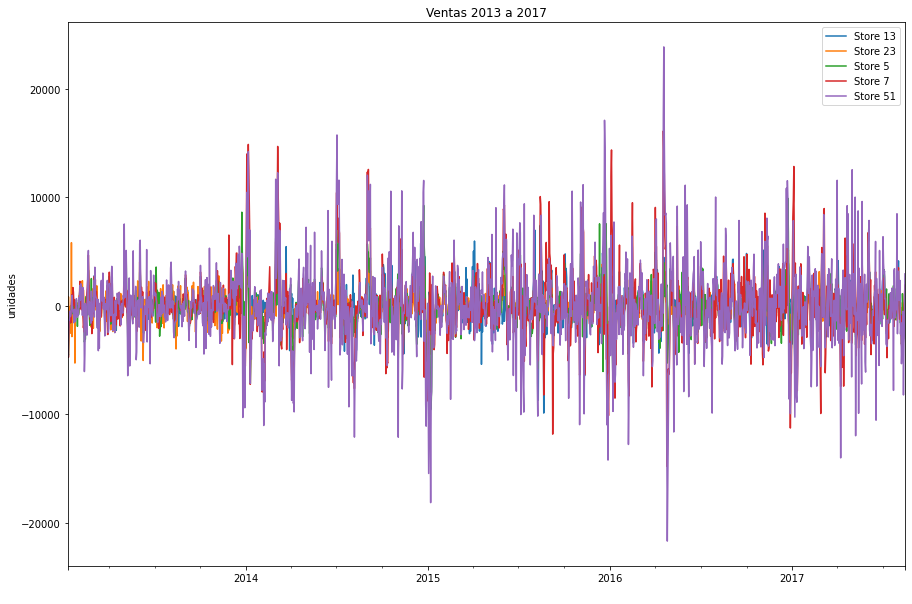

In [109]:
figura(df_diff,
       'Ventas 2013 a 2017',
       'unidades');

### **Tasa de crecimiento:**


Esta transformación lleva a una escala comparable, los datos de las sucursales.


Observamos que si bien se suavizan los movimientos de la serie, se mantiene cierta tendencia al estar comparando contra el primer período.





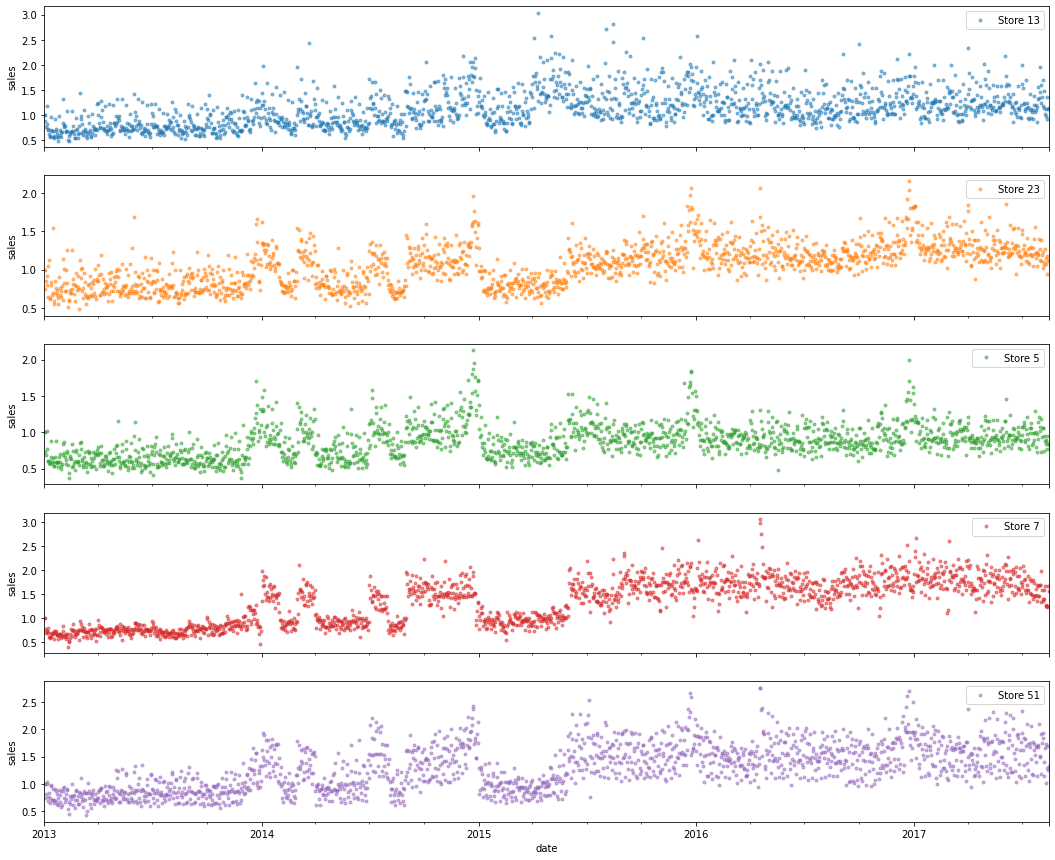

In [110]:
# Tasa de crecimiento

df_growth = df_filtered.div(df_filtered.iloc[0])

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_growth), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_growth))

# sns.boxplot(x="Weekday", 
#             y="Sales",
#             order= ordered_weekdays,
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_growth),
#             linewidth=2)

axes = df_growth.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')



El método de 'tasa de crecimiento'  que se detalla a continuación,

Elimina la tendencia.


Tiene como limitación: asimetría con respecto a cambios positivos y negativos: Subir de 100 a 125 (aumento de 25%), bajar de 125 a 100 (caída de “solo” 20%).

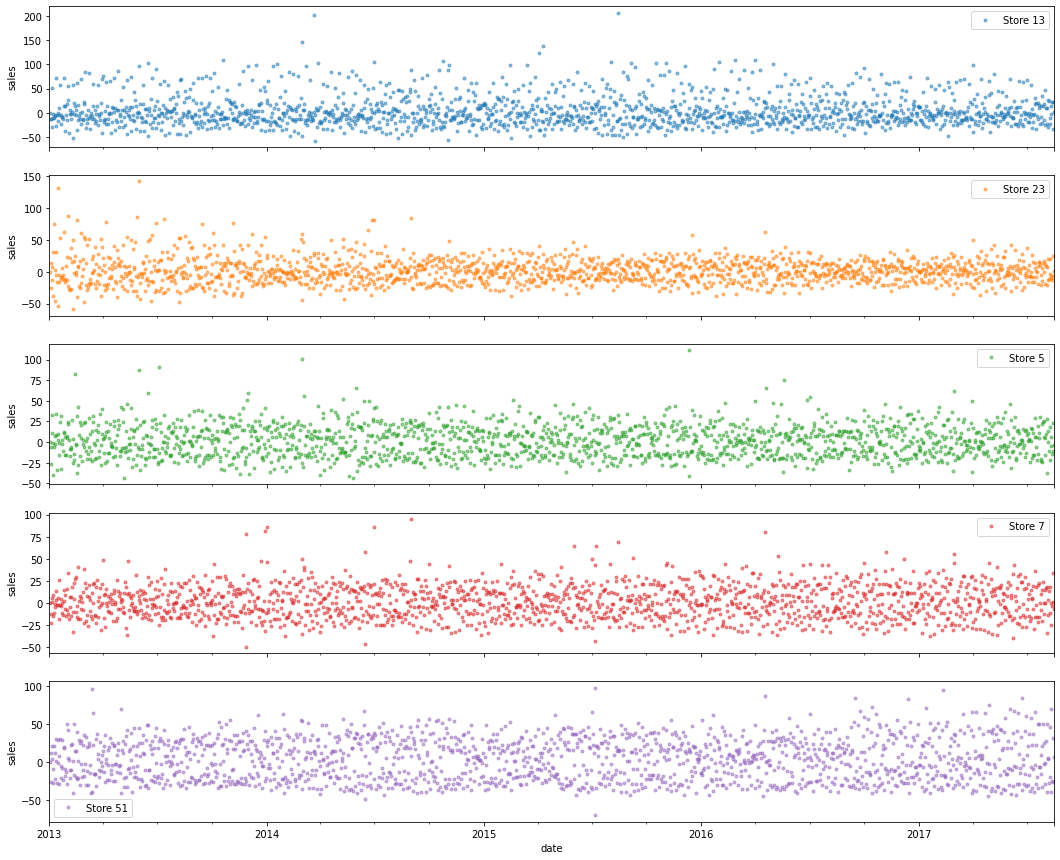

In [111]:
# Tasas de crecimiento de la serie

df_growth_2 = df_filtered.pct_change().mul(100)

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_growth_2), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

axes = df_growth_2.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

Otra alternativa para analizar la tasa de crecimiento es la siguiente:

In [144]:
# ##ALTERNATIVA
# # calculando el porcentaje de variación del día.
variacion_diaria = df_agg / df_agg.shift(1) - 1
df_agg['var_diaria'] = variacion_diaria
df_agg['var_diaria'][:5]

date
2013-01-01         NaN
2013-01-02    0.000000
2013-01-03   -0.237416
2013-01-04   -0.005689
2013-01-05    0.174470
Freq: D, dtype: float64

Vemos que el grafico representa la diferencia de un valor pasado y un valor presente en términos de porcentaje del valor pasado.  

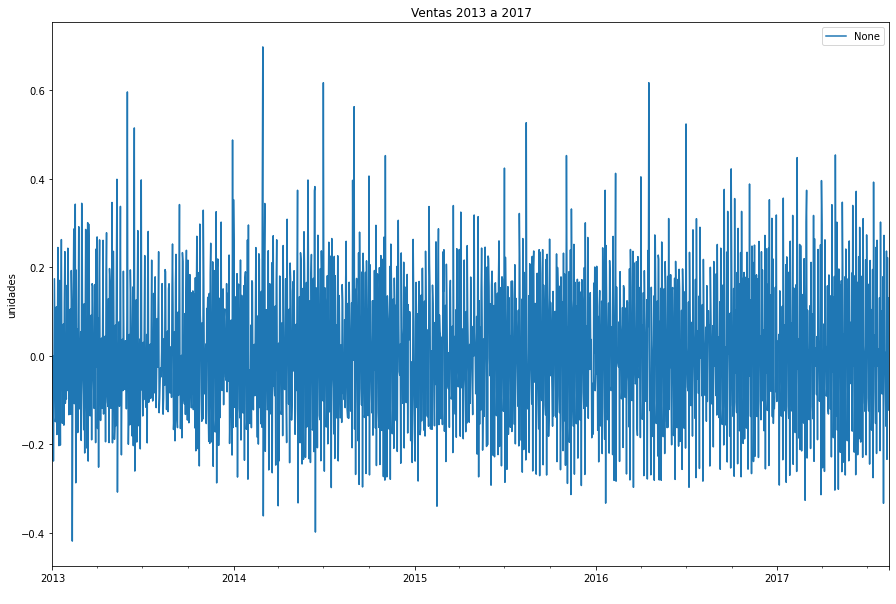

In [145]:
figura(variacion_diaria,
       'Ventas 2013 a 2017',
       'unidades');

### **Estandarización:**

ESTANDARIZACION DE DATOS

Medir los datos en unidades de desviacion estandar

La estandarización de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático implementados en scikit-learn; podrían comportarse mal si las características individuales no se parecen más o menos a datos distribuidos normal patrón: Gaussiano con media cero y varianza unitaria.


#### **StandarScaler**


StandardScaler: transformamos los datos para centrarlos eliminando el valor medio de cada característica, luego la escalamos dividiendo las características no constantes por su desviación estándar usando StandardScaler.


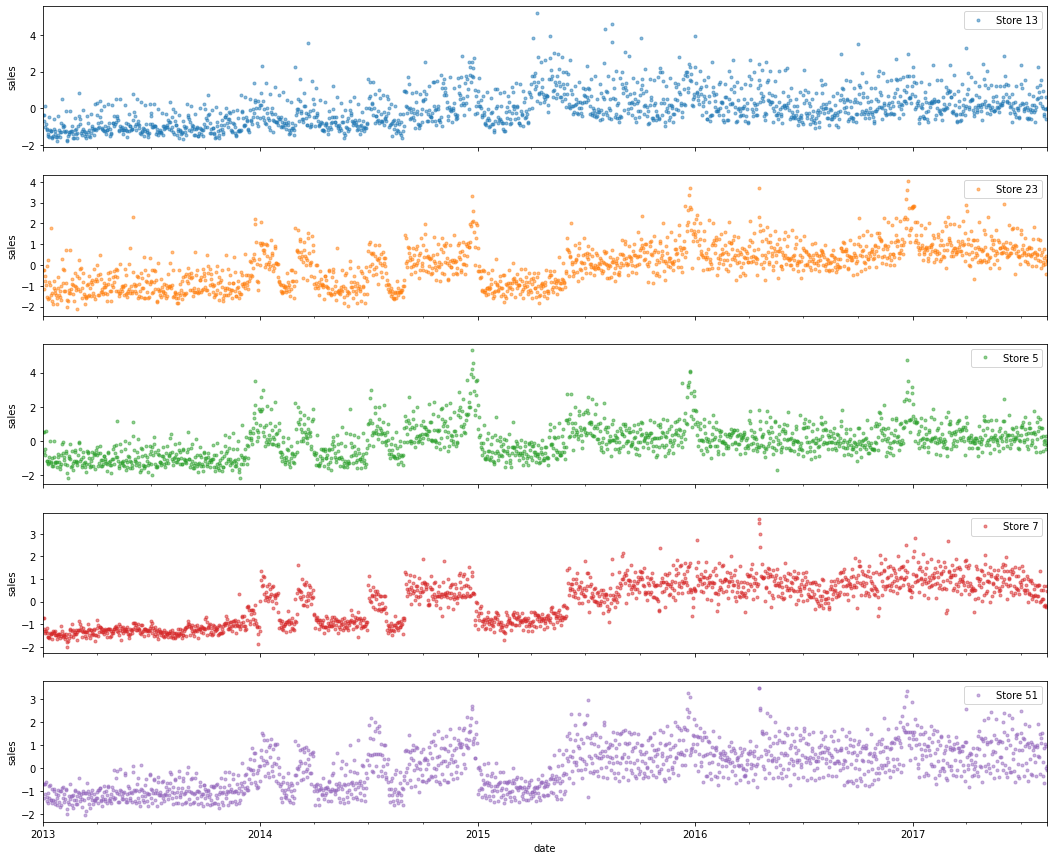

In [113]:
# Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
df_std = pd.DataFrame(scaler.fit_transform(df_filtered), 
                       index=df_filtered.index, 
                       columns=df_filtered.columns, dtype=None, copy=False)


# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_std), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_std))

axes = df_std.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

#### **RobustScaler**


RobustScaler: Para datos que contienen muchos valores atípicos, es probable que el escalado utilizando la media y la varianza de los datos no funcione muy bien. En estos casos, puede usar RobustScaler como reemplazo directo. Utiliza estimaciones más sólidas para el centro y rango de sus datos.

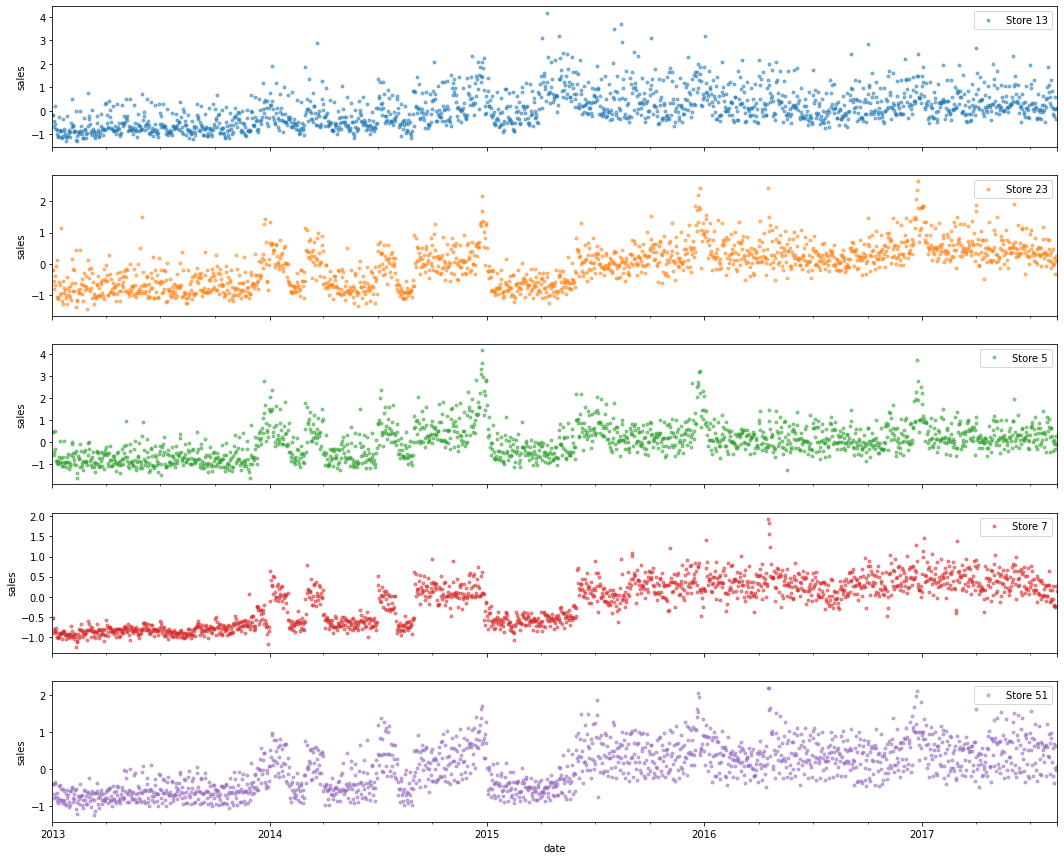

In [114]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
df_rscaler = robustscaler.fit_transform(df_filtered)
df_rscaler = pd.DataFrame(df_rscaler, columns = df_filtered.columns, index=df_filtered.index)

axes = df_rscaler.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

#### **MinMaxScaler**

Min-MAX: Transforma los datos a un rango fijo. Incluye la solidez contra las desviaciones estándar muy pequeñas en las variables y la preservación de entradas cero en datos ralos.

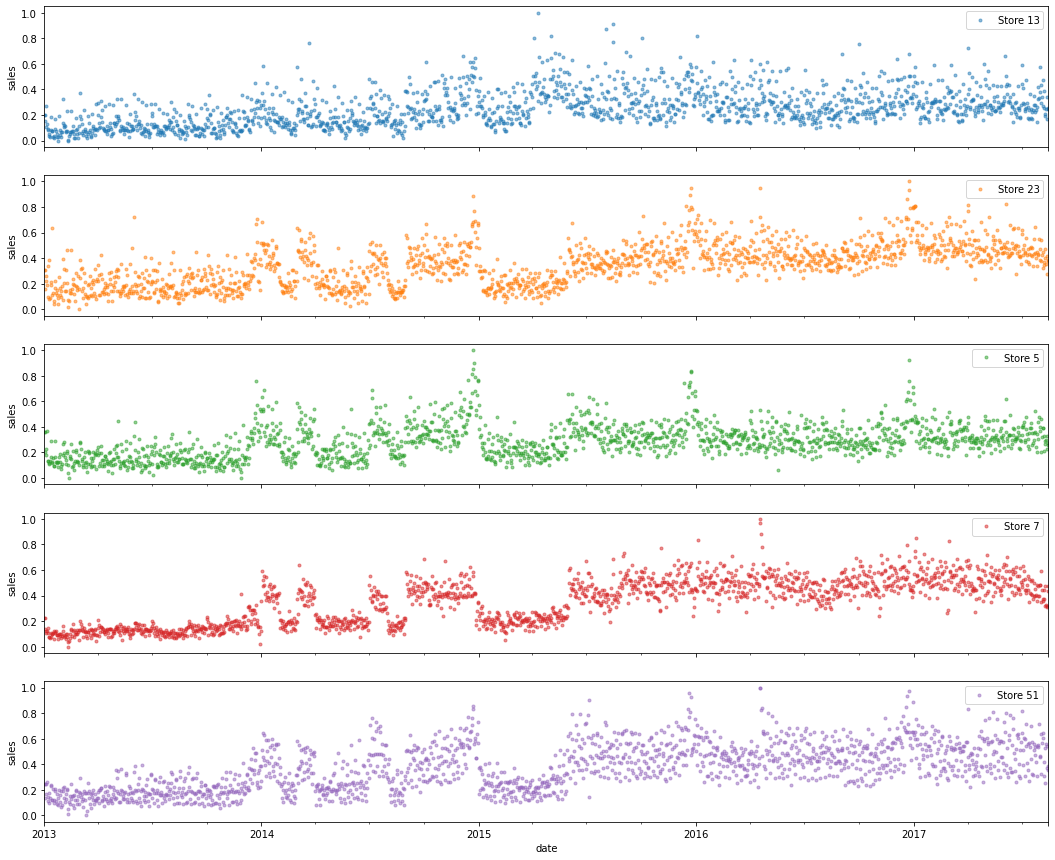

In [115]:
#Minmax. Escalamos los datos en el rango 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))  
minmax = pd.DataFrame(scaler.fit_transform(df_filtered), 
                     columns=df_filtered.columns, index=df_filtered.index)
axes = minmax.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

### **Normalización:**

Normalizar es cambiar la forma de la distribución de una variable numérica.

Hay dos tipos de transformaciones disponibles: transformaciones de cuantiles y transformaciones de potencia.

Tanto las transformaciones de cuantiles como las de potencia se basan en transformaciones monótonas de las características y, por lo tanto, preservan el rango de los valores a lo largo de cada característica.

QuantileTransformer: proporciona una transformación no paramétrica para asignar los datos a una distribución uniforme con valores entre 0 y 1.

Transformacion Box Cox: Las transformaciones de potencia son una familia de transformaciones paramétricas que tienen como objetivo mapear datos de cualquier distribución lo más cerca posible de una distribución gaussiana.

Estandarización Z

Mediante este método, la media se convertirá en 0 después de la transformación, y la variación y la diferencia estándar se convertirán en 1 (considerada la fórmula de la varianza)

In [116]:
from scipy import stats
from scipy.stats.stats import zscore
zscore_df = stats.zscore(df_filtered)
zscore_df= pd.DataFrame(zscore_df, columns=df_filtered.columns, index=df_filtered.index)     
print(zscore_df)


            Store 13  Store 23   Store 5   Store 7  Store 51
date                                                        
2013-01-01 -0.380191 -0.222209  0.514678 -0.718215 -0.705341
2013-01-02 -0.380191 -0.222209  0.514678 -0.718215 -0.705341
2013-01-03 -0.711451 -1.151047 -0.618181 -1.199541 -1.329217
2013-01-04 -1.012080 -0.751536 -0.787781 -1.408631 -1.127428
2013-01-05  0.092675 -0.514713 -0.449261 -1.317654 -0.719228
...              ...       ...       ...       ...       ...
2017-08-11 -0.030964  0.051400  0.078887 -0.170871  1.015563
2017-08-12  0.629476 -0.436377 -0.463495 -0.245433 -0.013161
2017-08-13 -0.599283  0.438606  0.292806 -0.209477  0.959424
2017-08-14 -0.038105  0.171907 -0.121149  0.690624 -0.107582
2017-08-15  0.010815  0.234696 -0.244498  0.475885  0.084658

[1688 rows x 5 columns]


#### **Box Cox:**

Transformación de BoxCox


Al observar el parámetro de potencia λ de la transformación de boxcox, puede ver que podemos comprimir los valores atípicos cada vez más eligiendo valores más bajos de λ. Además obtenemos un estiramiento "negativo" de valores originales bajos inferiores a uno. Si fijamos λ=0.5 y variamos la constante c podemos observar solo ligeras diferencias de compresión en valores altos. Por otro lado podemos ver que el estiramiento de valores bajos es aún más fuerte de constantes c cercanas a cero.

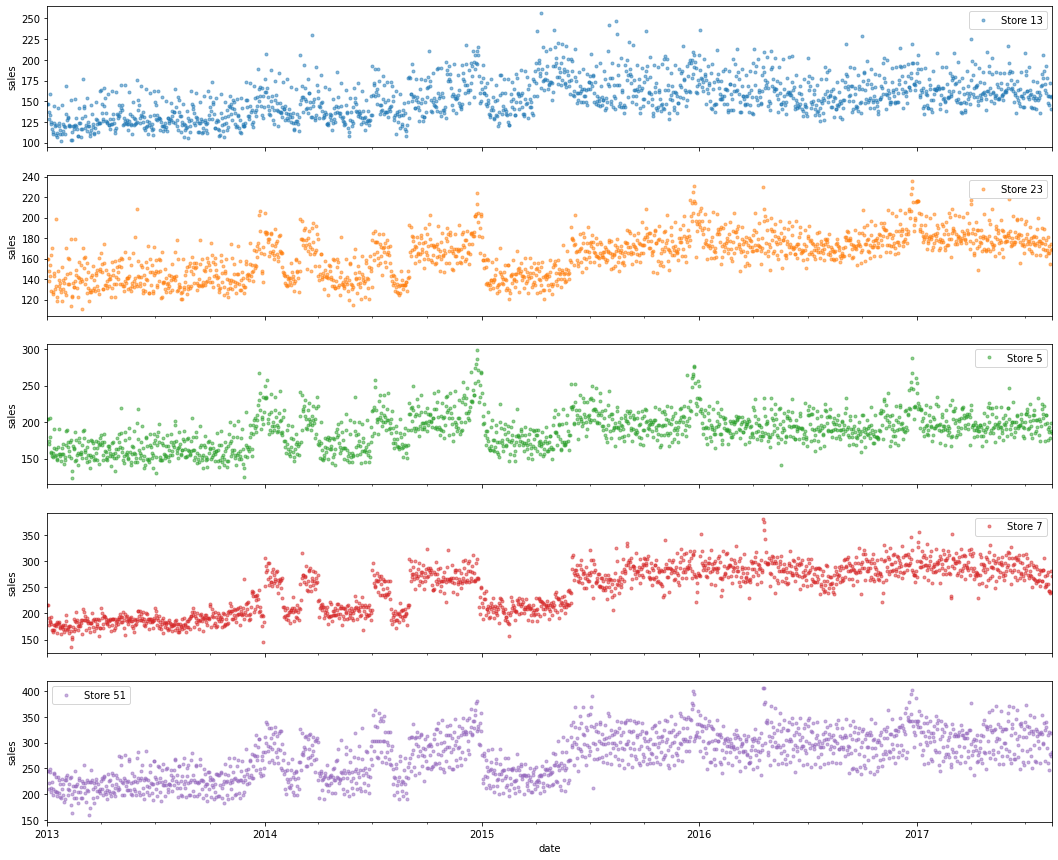

In [117]:
# Transformaciones de Box y Cox
from scipy.stats import boxcox

df_boxcox = df_filtered.copy()
for column in df_filtered.columns:
  data = boxcox(df_filtered[column], lmbda=0.5)
  df_boxcox[column] = data

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_boxcox), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_boxcox))

axes = df_boxcox.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

### **Comparación de métodos**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

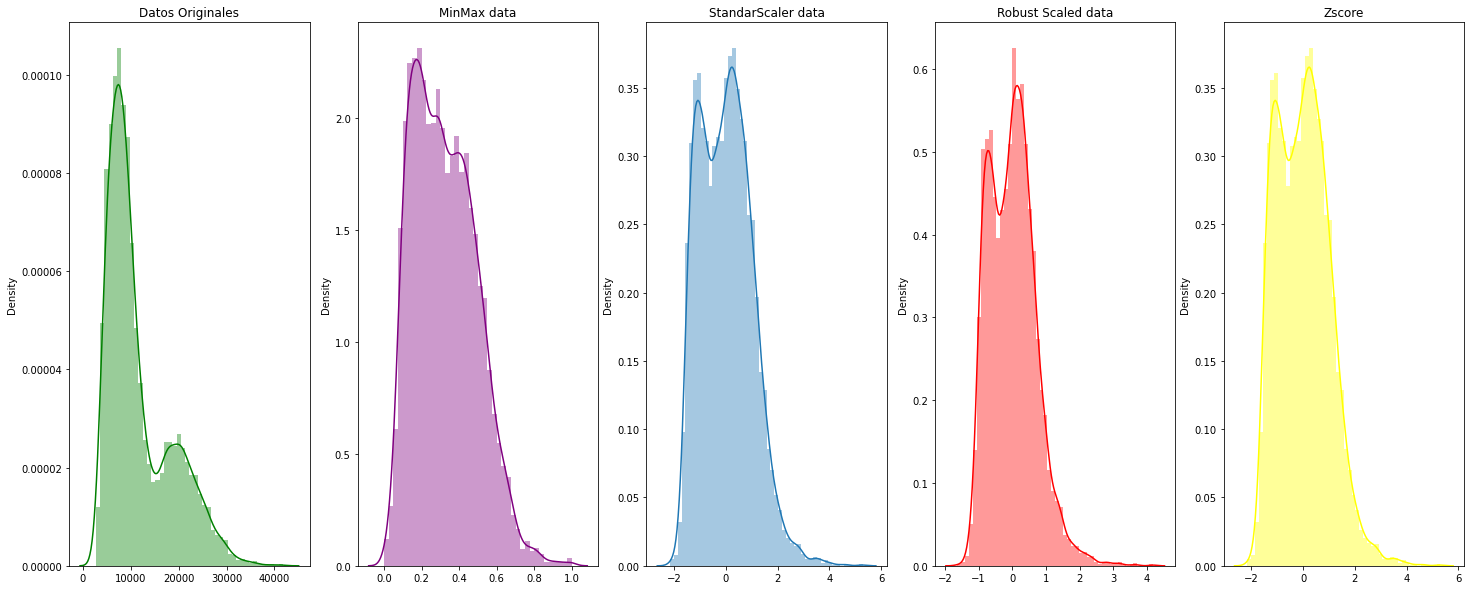

In [118]:
#Comparación
fig, ax=plt.subplots(1,5,figsize=(25,10))
sns.distplot(df_filtered, ax=ax[0],color='Green')
ax[0].set_title("Datos Originales")
sns.distplot(minmax, ax=ax[1], color ='Purple')
ax[1].set_title("MinMax data")
sns.distplot(df_std, ax=ax[2])
ax[2].set_title("StandarScaler data")
sns.distplot(df_rscaler, ax=ax[3], color='Red')
ax[3].set_title("Robust Scaled data")
sns.distplot(zscore_df, ax=ax[4], color='Yellow')
ax[4].set_title("Zscore")

plt.show()

## **Tratamiento de outliers:**

Variables dummy


In [119]:
df_filtered

,Store 13,Store 23,Store 5,Store 7,Store 51
date,,,,,
2013-01-01,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990
2013-01-02,5516.831000,6560.33700,10598.619020,11997.502000,15134.490990
2013-01-03,4852.438995,4911.20401,7770.968000,9277.958000,11170.057015
2013-01-04,4249.484000,5620.52800,7347.641991,8096.573018,12452.326000
2013-01-05,6465.232000,6041.00200,8192.598000,8610.605999,15046.247000
...,...,...,...,...,...
2017-08-11,6217.257000,7046.12400,9510.871000,15090.052970,26070.018000
2017-08-12,7541.866000,6180.08500,8157.070000,14668.772022,19532.964000
2017-08-13,5077.408995,7733.60000,10044.821000,14871.927000,25713.284030


In [120]:

df_sum = pd.DataFrame(data = df_filtered.mean(axis=1),index = df_filtered.index, columns=['sales'])
# df_sum = pd.DataFrame(data = df_filtered.sum(axis=1),index = df_filtered.index, columns=['sales'])
df_sum['date']= pd.to_datetime(df_filtered.index, format="%Y/%m/%d")
df_sum['Year'] = df_sum.date.dt.year
df_sum['Month'] = df_sum.date.dt.month
df_sum['Year_month'] = df_sum.date.dt.strftime('%Y-%m')
df_sum['Weekday'] = df_sum.date.dt.strftime('%A')
df_sum['Day'] = df_sum.date.dt.day
df_sum['diff1'] = df_sum.sales.diff(1)
df_sum['diff7'] = df_sum.sales.diff(7)

In [121]:
df_sum

,sales,date,Year,Month,Year_month,Weekday,Day,diff1,diff7
date,,,,,,,,,
2013-01-01,9961.556002,2013-01-01,2013,1,2013-01,Tuesday,1,NaN,NaN
2013-01-02,9961.556002,2013-01-02,2013,1,2013-01,Wednesday,2,0.000000,NaN
2013-01-03,7596.525204,2013-01-03,2013,1,2013-01,Thursday,3,-2365.030798,NaN
2013-01-04,7553.310602,2013-01-04,2013,1,2013-01,Friday,4,-43.214602,NaN
2013-01-05,8871.137000,2013-01-05,2013,1,2013-01,Saturday,5,1317.826398,NaN
...,...,...,...,...,...,...,...,...,...
2017-08-11,12786.864594,2017-08-11,2017,8,2017-08,Friday,11,2325.195394,-1341.779613
2017-08-12,11216.151404,2017-08-12,2017,8,2017-08,Saturday,12,-1570.713190,-3062.498796
2017-08-13,12688.208205,2017-08-13,2017,8,2017-08,Sunday,13,1472.056801,-1683.062995


Detección de anomalías con fb prophet

In [122]:
from fbprophet import Prophet
# anom_df = df_sum.reset_index()[['date', 'sales']].rename({'date':'ds', 'sales':'y'}, axis='columns')
anom_df = df_sum[['date', 'sales']].rename({'date':'ds', 'sales':'y'}, axis='columns')
train = anom_df[(anom_df['ds'] >= '2013-01-01') & (anom_df['ds'] <= '2017-06-30')]
test = anom_df[(anom_df['ds'] >= '2017-06-30') & (anom_df['ds'] <= '2017-08-17')]
# train = df_sum.loc['2013-01':'2017-06']
# test = df_sum.loc['2017-06':'2017-08']


In [123]:
anom_df

,ds,y
date,,
2013-01-01,2013-01-01,9961.556002
2013-01-02,2013-01-02,9961.556002
2013-01-03,2013-01-03,7596.525204
2013-01-04,2013-01-04,7553.310602
2013-01-05,2013-01-05,8871.137000
...,...,...
2017-08-11,2017-08-11,12786.864594
2017-08-12,2017-08-12,11216.151404
2017-08-13,2017-08-13,12688.208205


In [124]:
m = Prophet( seasonality_mode = 'multiplicative')
m.fit(train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
future = m.make_future_dataframe(periods=46, freq='D')

In [126]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1683,2017-08-11,12621.736576,10537.574640,14799.414809
1684,2017-08-12,14082.781038,11832.776377,16253.103338
1685,2017-08-13,14203.298202,12221.306779,16306.619773
1686,2017-08-14,12885.808493,10710.170439,15093.369106
1687,2017-08-15,11717.768126,9582.325658,13747.897700


In [127]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,6972.909687,5597.031923,9876.217932,6972.909687,6972.909687,0.120357,0.120357,0.120357,-0.077034,-0.077034,-0.077034,0.197392,0.197392,0.197392,0.0,0.0,0.0,7812.149903
1,2013-01-02,6978.681584,6608.832749,10591.987318,6978.681584,6978.681584,0.240693,0.240693,0.240693,0.058130,0.058130,0.058130,0.182564,0.182564,0.182564,0.0,0.0,0.0,8658.404656
2,2013-01-03,6984.453481,4794.733423,9321.697879,6984.453481,6984.453481,-0.001729,-0.001729,-0.001729,-0.169051,-0.169051,-0.169051,0.167322,0.167322,0.167322,0.0,0.0,0.0,6972.376390
3,2013-01-04,6990.225379,5951.689474,10130.379502,6990.225379,6990.225379,0.142677,0.142677,0.142677,-0.009205,-0.009205,-0.009205,0.151883,0.151883,0.151883,0.0,0.0,0.0,7987.573090
4,2013-01-05,6995.997276,6437.498382,10681.573428,6995.997276,6995.997276,0.228120,0.228120,0.228120,0.091660,0.091660,0.091660,0.136460,0.136460,0.136460,0.0,0.0,0.0,8591.923056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2017-08-11,14526.441365,10537.574640,14799.414809,14492.529715,14565.889102,-0.131120,-0.131120,-0.131120,-0.009205,-0.009205,-0.009205,-0.121915,-0.121915,-0.121915,0.0,0.0,0.0,12621.736576
1684,2017-08-12,14528.108536,11832.776377,16253.103338,14492.466037,14568.627815,-0.030653,-0.030653,-0.030653,0.091660,0.091660,0.091660,-0.122313,-0.122313,-0.122313,0.0,0.0,0.0,14082.781038
1685,2017-08-13,14529.775707,12221.306779,16306.619773,14492.904253,14572.184183,-0.022470,-0.022470,-0.022470,0.099084,0.099084,0.099084,-0.121554,-0.121554,-0.121554,0.0,0.0,0.0,14203.298202
1686,2017-08-14,14531.442879,10710.170439,15093.369106,14492.556897,14575.329428,-0.113246,-0.113246,-0.113246,0.006416,0.006416,0.006416,-0.119663,-0.119663,-0.119663,0.0,0.0,0.0,12885.808493


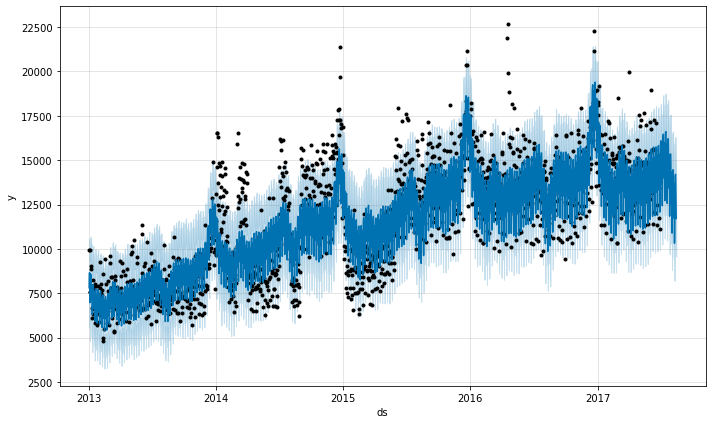

In [128]:
result = pd.concat([anom_df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)

In [129]:
result

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2013-01-01,9961.556002,7812.149903,5597.031923,9876.217932
2013-01-02,9961.556002,8658.404656,6608.832749,10591.987318
2013-01-03,7596.525204,6972.376390,4794.733423,9321.697879
2013-01-04,7553.310602,7987.573090,5951.689474,10130.379502
2013-01-05,8871.137000,8591.923056,6437.498382,10681.573428
...,...,...,...,...
2017-08-11,12786.864594,12621.736576,10537.574640,14799.414809
2017-08-12,11216.151404,14082.781038,11832.776377,16253.103338
2017-08-13,12688.208205,14203.298202,12221.306779,16306.619773


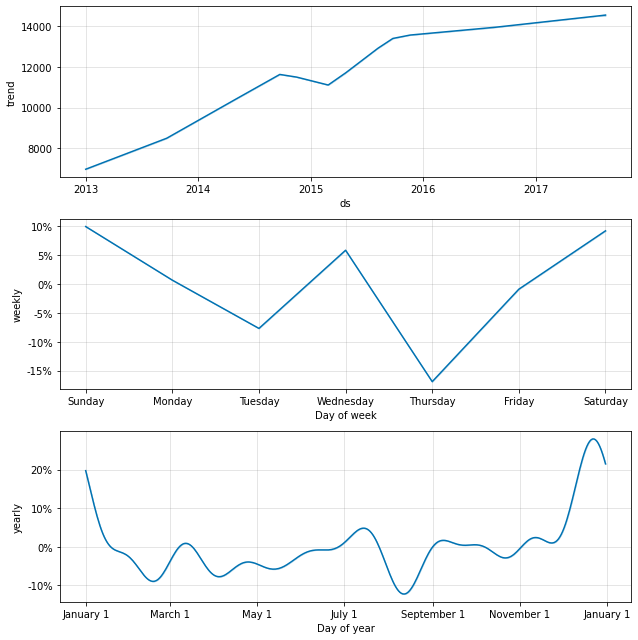

In [130]:
comp = m.plot_components(forecast)

In [131]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [132]:
# result['anomaly'] = result.apply(lambda x: 'Yes' if((x['y'] > x['yhat_upper']) | (x['y'] < x['yhat_lower'])) else 'No', axis = 1)
 
# result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.2 * x['uncertainty']) else 'No', axis = 1)

result['anomaly'] = result.apply(lambda x: 'Yes' if((x['y'] > x['yhat_upper'] + x['uncertainty']) | (x['y'] < x['yhat_lower'] - x['uncertainty'])) else 'No', axis = 1)

In [133]:
result[result['anomaly'] == 'Yes']

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-01-02,16516.446728,9539.466400,7193.019709,11619.650485,6976.980328,4426.630776,Yes
2014-12-23,21371.273400,13654.713261,11551.348192,15845.523644,7716.560139,4294.175451,Yes
2016-04-17,21907.440422,14444.289195,12288.052761,16527.306753,7463.151227,4239.253992,Yes
2016-04-18,22693.543390,13203.373446,11084.770327,15480.539991,9490.169943,4395.769665,Yes
2016-04-19,19894.019202,12085.265803,9964.771720,14189.093891,7808.753399,4224.322171,Yes


In [134]:
#visualize the anomaly data
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='Sales')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='Y', step="year", stepmode="backward"),
              dict(count=4, label='4M', step="month", stepmode="backward"),
              dict(count=1, label='M', step="month", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()

Variables exógenas: Incidencia en la serie de tiempo de la evolución del precio del petróleo. 

Como habíamos mencionado uno de los dataset adicionales nos muestra el precio del petróleo lo cual para la serie de tiempo analizada es una variable exógena. 
A partir del conocimiento de dominio conocemos que “Ecuador es económicamente dependiente del petróleo”, en el gráfico podemos ver la correlación existente:

La caída en el volumen de ventas de la cadena de supermercados para el primer trimestre de 2015 se puede relacionar en parte por la baja del precio del petróleo en ese periodo.

In [135]:
url2 = "https://www.dropbox.com/scl/fo/wwm1oun8cttz2vc0kmn7j/h/oil.csv?dl=1&rlkey=uz9o3x6wfsihyx4metxivdum7"

In [136]:
df_oil = pd.read_csv(url2)
df_oil.index = pd.to_datetime(df_oil.date)
df_oil = df_oil.asfreq('D', method='bfill')
df_oil.fillna(method='bfill', inplace=True)
df_oil.drop(['date'], axis=1, inplace=True)

df_oil.head(5)

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,93.20


In [137]:
df_agg.head(5)
df_agg_v1=pd.Series.to_frame(df_agg)

In [138]:
agg_oil = pd.merge(df_agg_v1, df_oil, how='inner', left_index=True, right_index=True)
agg_oil_std = pd.DataFrame(scaler.fit_transform(agg_oil), 
                      
                      dtype=None, copy=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [140]:
agg_oil_std.columns = ['Sales','Precio Oil']

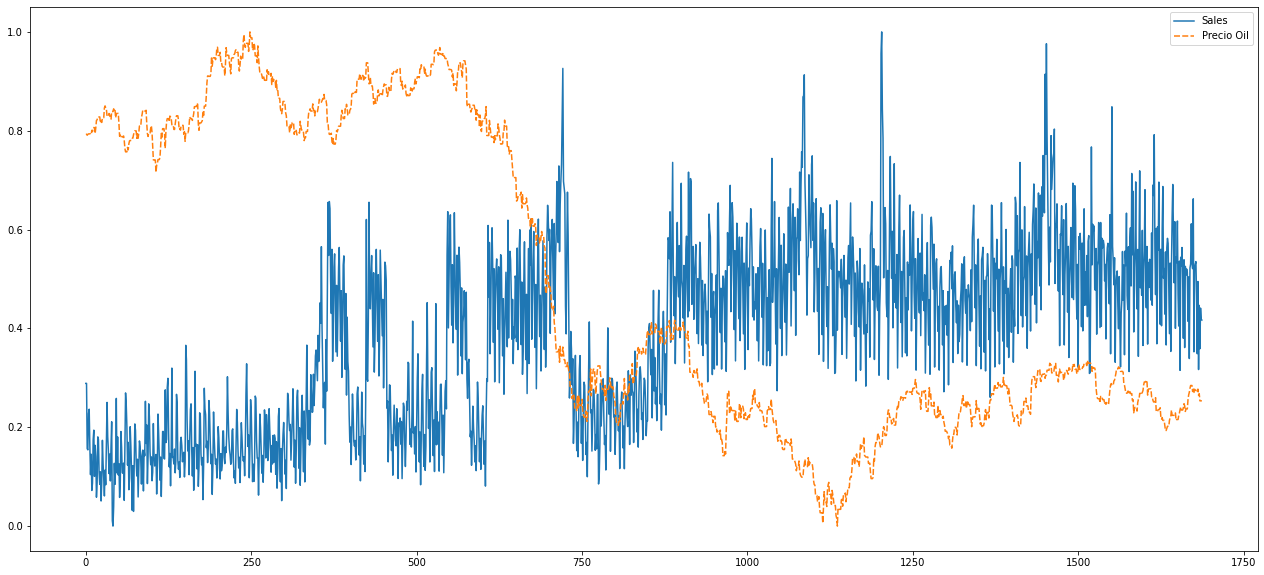

In [141]:
fig = plt.figure(figsize=(22,10))
sns.lineplot(data=agg_oil_std.rename({'dcoilwtico':'oil_price'}, axis='columns'))

plt.show()